## Correlation
For this lab, we're going to resurrect the California Housing Price Dataset which can be downloaded to your computer from our [Datasets folder](https://github.com/summerela/python_data_analysis/tree/master/Datasets). 

In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [31]:
cali_df = pd.read_csv("../../Datasets/cali_housing.csv")
cali_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


First we'll drop rows that contain more than 50% null values:  

In [35]:
cali_df = cali_df.loc[:, cali_df.isnull().mean() < .5]

For the sake of simplicity, and because it does not appear that a 0 measurement would affect our results, we will fill in remaining null values with 0's: 

In [36]:
cali_df = cali_df.fillna(0)

## Examine Relationships Using Correlation Matrix
Now that we've cleaned up our dataset, let's calculate and plot the covariance matrix so that we can get a better picture of which variables might be related: 

In [39]:
# calucate correlation of the entire dataframe using pandas corr()
corr_mat = cali_df.corr() 

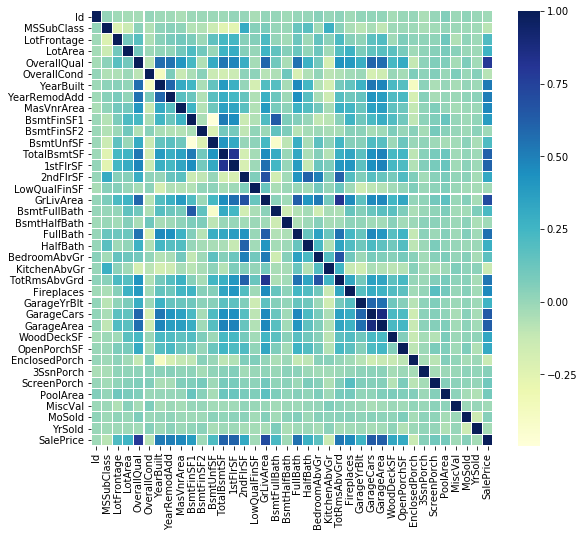

In [43]:
# plot results 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

Remembering that 1 shows a perfect correlation, and 0 no correlation whatsoever, using the heatmap above and the color legend on the right, pick a variable that is strongly correlated with SalePrice to examine in more detail. Create a textblock below and write the colum name in it: 

GrLiveArea

### Scatterplot of SalePrice and Chosen Variable
We'll cretae a quick scatterplot to view the correlation between the two variables: 

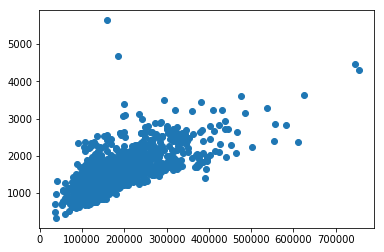

In [56]:
plt.scatter(cali_df.SalePrice, cali_df.GrLivArea)

Using the chart from the walk-through as guidance, describe the relationship between SalePrice and your chosen variable: 

These two variables appear to have a strong positive correlation with a few outliers. 

## Calculate Pearson's R2
For your chosen column and SalePrice, using pandas corr() method to calculate the Pearson Correlation Coefficient: 

In [57]:
cali_df[['SalePrice', 'GrLivArea']].corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


Does the correlation coefficient imply a strong relationship? 

## Detect Outliers

### Zscores
For your chosen column, use scipy.stats zscore() function to detect outliers greather than 2.5 standard deviations away from the mean: 

In [48]:
from scipy.stats import zscore
cali_df["GrLivArea_Z"] = zscore(cali_df.GrLivArea)

In [51]:
len(cali_df[abs(cali_df.GrLivArea_Z) > 2.5])

1436

There's quite a few of these. Let's double check using a boxplot. 

### Boxplot
Create a boxplot for your chosen column: 

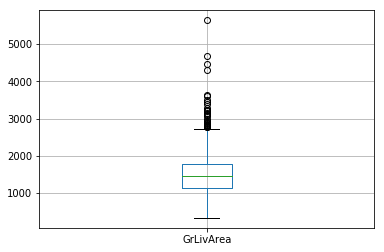

In [53]:
cali_df[["GrLivArea"]].boxplot()

If there are a large number of outliers. We have the following options: 
- Remove outliers from the dataframe by filtering `cali_df = cali_df[abs(cali_df.GrLivArea_Z) > 2.5]`
- Increase our outlier criteria from 2.5 to 3
- Examine the distribution of the column with more graphs `cali_df[["GrLivArea"]].plot(kind='bar')` to see if we can spot a trend
- Try different clustering algorithms to stop patterns

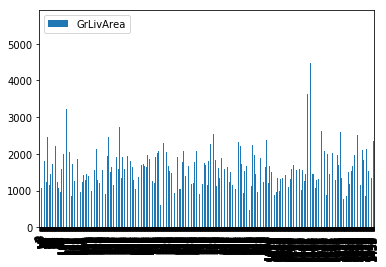

In [55]:
cali_df[["GrLivArea"]].plot(kind='bar')